In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cmath

import scipy.special as sp
import mpmath
from mpmath import mp
from scipy.integrate import quad
from scipy.optimize import root
from scipy.integrate import dblquad

import sympy

import mpmath
from mpmath import mp
mp.dps = 25

In [2]:
def fslope(slope, chi1, chi0, bound0):
    return bound0*np.exp(slope*(np.log(chi1)-np.log(chi0)))

180
180
180
180


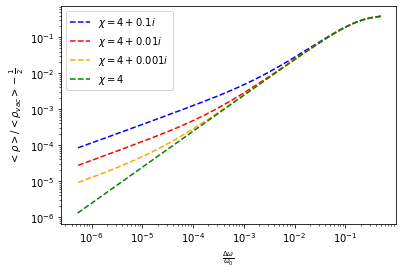

In [3]:
# filenamesTM = ['min_2DTM_2+1e-1j_Qsrc','min_2DTM_4+1e-1j_Qsrc','min_2DTM_6+1e-1j_Qsrc']
# filenamesTE = ['min_2DTE_2+1e-1j_Qsrc','min_2DTE_4+1e-1j_Qsrc','min_2DTE_6+1e-1j_Qsrc']
# filenames3D = ['min_3Dz_2+1e-1j_Qsrc', 'min_3Dz_4+1e-1j_Qsrc','min_3Dz_6+1e-1j_Qsrc']
# chis = [2 + 0.1*1j, 4 + 0.1*1j, 6 + 0.1*1j]
# filenamesTM = ['min_2DTM_4+1e-1j_Qsrc','min_2DTM_6+1e-1j_Qsrc','min_2DTM_9+1e-1j_Qsrc']
# filenames = ['mp_TM_Qsrc_run_chi4+0i_Qsrc','mp_TM_Qsrc_run_chi4+1e-3i_Qsrc','mp_TM_Qsrc_run_chi4+1e-2i_Qsrc','mp_TM_Qsrc_run_chi4+1e-1i_Qsrc']
filenames = ['mp_TEy_Qsrc_run_d1e-1_chi4+1e-1i_Qsrc','mp_TEy_Qsrc_run_d1e-1_chi4+1e-2i_Qsrc','mp_TEy_Qsrc_run_d1e-1_chi4+1e-3i_Qsrc','mp_TEy_Qsrc_run_d1e-1_chi4+0i_Qsrc']
styles = ['dashed','dashed','dashed','dashed']
colors = ['blue','red','orange','green']
lab = ['$\chi = 4 + 0.1i$','$\chi = 4 + 0.01i$','$\chi = 4 + 0.001i$','$\chi = 4$']
for k in range(len(filenames)):
    filename = filenames[k]
    bounds_list = np.load(filename + '_bounds.npy')
    cur_Qsrc_list = np.load(filename + '_list.npy')
    start_ind = 0
    end_ind = 190
    print(len(bounds_list))
#     if k > 0:
#         Qmin = getQ(4 + 0.1*1j)
#         for j in range(len(cur_Qsrc_list)):
#             if cur_Qsrc_list[j] < Qmin:
#                 start_ind += 1
#             else:
#                 break
    plt.plot(np.reciprocal(2*cur_Qsrc_list[start_ind:end_ind]), (1 - bounds_list[start_ind:end_ind] - 0.5), color=colors[k], linestyle=styles[k], label=lab[k])

### label
plt.xscale('log')
plt.yscale('log')
# plt.xlabel('Inverse bandwidth $\\frac{1}{\Delta\omega}$')
# plt.xlabel('$\\frac{\omega_{0}}{2\Delta\omega}$')
plt.xlabel('$\\frac{\Delta\omega}{\omega_{0}}$')
# plt.ylabel('$1 + \\rho_{sca}(\\tilde{\omega})/\\rho_{0}$')
# plt.ylabel('$<\\rho>_{\omega_0, \Delta\omega}/\\rho_{0}$')
plt.ylabel('$<\\rho>/<\\rho_{vac}> - \\frac{1}{2}$')
# plt.title('Fullspace LDOS Minimization for Dipole in 3D Space')
# plt.title('Minimization for Dipole in 3D Space')
plt.legend()
plt.savefig('totLDOSminHS_TE_chi4vsQsrc.pdf', bbox_inches='tight')
plt.savefig('totLDOSminHS_TE_chi4vsQsrc.png', bbox_inches='tight')

In [4]:
bounds_list[140:]

array([0.49997528, 0.49997712, 0.49997882, 0.49998039, 0.49998185,
       0.49998319, 0.49998444, 0.4999856 , 0.49998667, 0.49998766,
       0.49998857, 0.49998942, 0.49999021, 0.49999094, 0.49999161,
       0.49999223, 0.49999281, 0.49999334, 0.49999384, 0.4999943 ,
       0.49999472, 0.49999511, 0.49999547, 0.49999581, 0.49999612,
       0.49999641, 0.49999668, 0.49999692, 0.49999715, 0.49999736,
       0.49999756, 0.49999774, 0.49999791, 0.49999806, 0.49999821,
       0.49999834, 0.49999846, 0.49999858, 0.49999868, 0.49999878])

<ipython-input-13-a605aac9a1c4>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


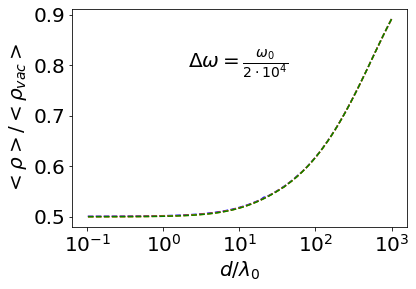

In [13]:
filenames = ['mp_TEy_drun_Qsrc10000_chi4+1e-1i_d','mp_TEy_drun_Qsrc10000_chi4+1e-2i_d','mp_TEy_drun_Qsrc10000_chi4+1e-3i_d','mp_TEy_drun_Qsrc10000_chi4+0i_d']

styles = ['dashed','dotted','dashed','dotted']
styles = ['dashed','dashed','dashed','dashed']
colors = ['blue','red','orange','green']
lab = ['$\chi = 4 + 0.1i$','$\chi = 4 + 0.01i$','$\chi = 4 + 0.001i$','$\chi = 4$']
plt.rc('font', size=20)
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=8)
for k in range(len(filenames)):
    filename = filenames[k]
    bounds_list = np.load(filename + '_bounds.npy')
    d_list = np.load(filename + '_list.npy')
    start_ind = 0
    shift = 0
    #plt.plot(d_list[start_ind:], (1-bounds_list[start_ind:] - shift), color=colors[k], linestyle=styles[k], label=lab[k])
    plt.plot(d_list[start_ind:], (1-bounds_list[start_ind:] - shift), color=colors[k], linestyle=styles[k])

filename = filenames[0]
bounds_list = np.load(filename + '_bounds.npy')
d_list = np.load(filename + '_list.npy')
plt.annotate('$\Delta\omega = \\frac{\omega_{0}}{2\cdot 10^{4}}$', (d_list[int(len(d_list)/2)], (1 - bounds_list[-1]) + 3*(-bounds_list[0] + bounds_list[-1])/4), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center
### label
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('$d/\lambda_{0}$')
plt.ylabel('$<\\rho>/<\\rho_{vac}>$')
ax = plt.axes()
ax.set_xticks([0.1,1,10,100,1000])
# plt.legend()
plt.savefig('totLDOSminHS_TEy_Q1e4_chi4vsd.pdf', bbox_inches='tight')
plt.savefig('totLDOSminHS_TEy_Q1e4_chi4vsd.png', bbox_inches='tight')

In [16]:
# filenames = ['mp_TEy_Qsrc_run_d1e-1_chi4+1e-1i_Qsrc','mp_TEy_Qsrc_run_d1e-1_chi4+1e-2i_Qsrc','mp_TEy_Qsrc_run_d1e-1_chi4+1e-3i_Qsrc','mp_TEy_Qsrc_run_d1e-1_chi4+0i_Qsrc']
# for k in range(len(filenames)):
#     filename = filenames[k]
#     bounds_list = np.load(filename + '_bounds.npy')
#     cur_Qsrc_list = np.load(filename + '_list.npy')
#     start_ind = 0
#     end_ind = 140
#     np.save(filename + '_bounds.npy', bounds_list[0:140])
#     np.save(filename + '_list.npy', cur_Qsrc_list[0:140])